Please upload '2. Diagnose Diabetes.csv'


Saving 2. Diagnose Diabetes.csv to 2. Diagnose Diabetes.csv
=== Evaluation Metrics ===
Accuracy : 0.7208
Precision: 0.6071
Recall   : 0.6182

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



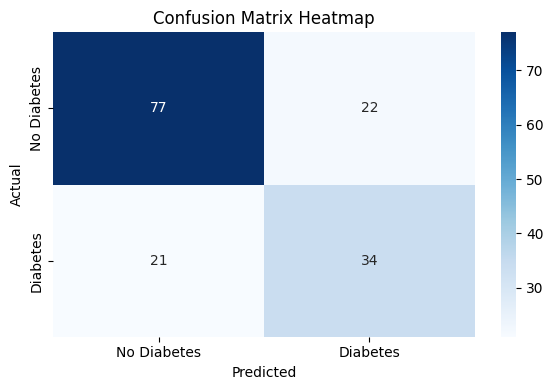

In [2]:
# Diabetes Classification using Pima Indians Dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# STEP 1: Upload the CSV file (for Google Colab / Jupyter Notebook)
try:
    df = pd.read_csv("2. Diagnose Diabetes.csv")
except FileNotFoundError:
    try:
        from google.colab import files
        print("Please upload '2. Diagnose Diabetes.csv'")
        uploaded = files.upload()
        df = pd.read_csv("2. Diagnose Diabetes.csv")
    except Exception as e:
        print("File upload failed. Please make sure the file name is correct.")
        raise e

# STEP 2: Separate features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# STEP 3: Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 4: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 5: Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# STEP 6: Make predictions
y_pred = model.predict(X_test_scaled)

# STEP 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("=== Evaluation Metrics ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# STEP 8: Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
